In [214]:
import numpy as np 
from numpy import load
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

import scipy 
from scipy.signal import correlate
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
#load data

stimulus = np.load('ProcAiryData/jh_IAAneg4_run1_trial2_bufferstim.npz')

response = np.load('ProcAiryData/jh_IAAneg4_run1_trial2_bufferclusts.npz')


IAAneg4_bufferclusts = np.load('ProcAiryData/jh_IAAneg4_run1_trial2_bufferclusts.npz')
IAAneg4_bufferclusts.keys()


In [9]:
stim_1798= stimulus['arr_0'].T

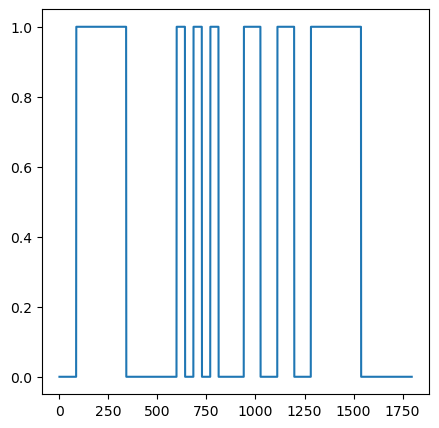

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1798), stim_1798)



In [39]:
response_cell_1 = response['arr_0'][:,0]



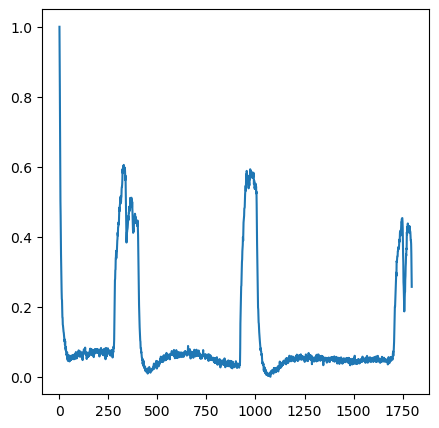

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1798), response['arr_0'][:,0])

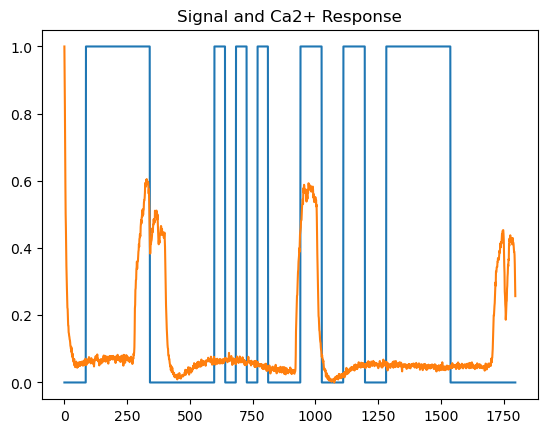

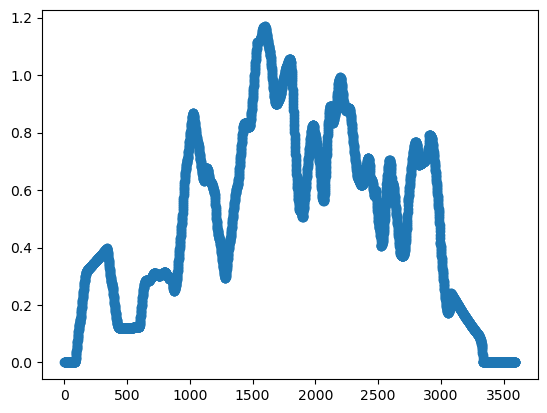

In [44]:
#find the highest cross correlation in the stimulus and the response, at the time shift

# cross_cor = scipy.signal.correlate(stim_1798, response['arr_0'][:,0], mode='full')


def cross_correlation(stimulus, response):
    cross_cor = scipy.signal.correlate(stimulus, response, mode='full')
    # cor_cut  = cross_corr[1797:3000]
    cor_cut = cross_corr[len(cross_corr)//2:] = 0





cross_corr = np.correlate(stim_1798, response_cell_1, mode='full')
# number_average = np.append(np.arange(1,101), (np.arange(1,100)[::-1]))
# #normalized by overlap
# cross_corr_normalize = cross_corr/number_average







plt.figure()
plt.plot(range(1798), stim_1798)
plt.plot(range(1798), response_cell_1)
plt.title('Signal and Ca2+ Response')
plt.show()



plt.figure()
plt.scatter(np.arange(cross_corr.size), cross_corr/100)
plt.show()
#use the appropriate time shift to compute STA (spike-triggered average)

In [55]:
cross_corr.shape

cor_cut  = cross_corr[1797:3000]


cross_corr.shape[0]//2

1797

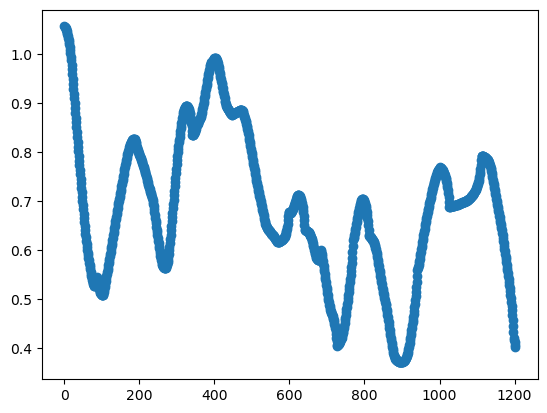

In [56]:
plt.figure()
plt.scatter(np.arange(cor_cut.size), cor_cut/100)
plt.show()

In [57]:
cor_cut_final= cor_cut[0:600]

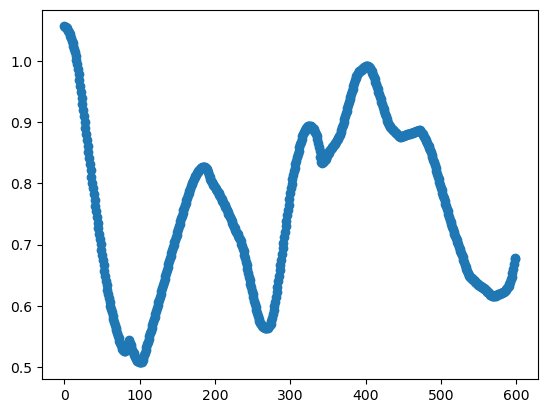

In [58]:
plt.figure()
plt.scatter(np.arange(cor_cut_final.size), cor_cut_final/100)
plt.show()

In [59]:
stim_1798= stimulus['arr_0'].T

In [76]:
s_of_t = np.zeros((600,stim_1798[600:].size ))

for stim in range(stim_1798[600:].size):
    #stim_1798[i]= stim_1798[i+600]
    s_of_t[:,stim] = stim_1798[stim:stim+600] 

    

In [124]:
stim_1798[600:].size 

1198

In [77]:
s_bar = np.sum(s_of_t, axis =1)/stim_1798[600:].size

In [78]:
response_cell_1.shape

(1798,)

In [79]:
n_T = np.sum(response_cell_1[600:])

In [80]:
s_of_t.shape

(600, 1198)

In [82]:
sta = np.zeros(s_of_t.shape[0])

for i in range(s_of_t.shape[1]):
    current_s_of_t = s_of_t[:,i]
    sta += (1/n_T)*(response_cell_1[600:][i]) * (current_s_of_t - s_bar)


In [126]:
sta.shape

(600,)

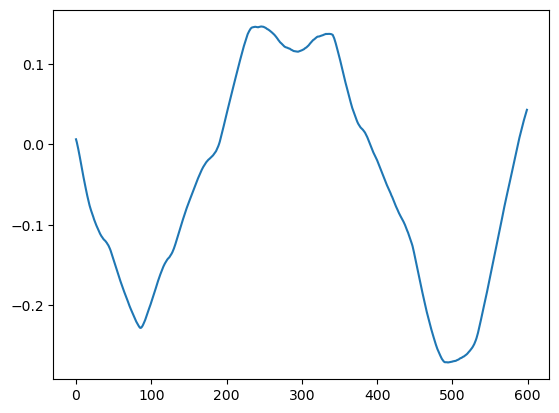

In [85]:
plt.plot(sta)

In [ ]:
s_of_t = np.array(s_of_t)


sta = np.zeros(s_of_t.shape[1])

# Loop over the number of columns in s_of_t
for i in range(s_of_t.shape[1]):
    column = s_of_t[:, i]  # Extract the ith column of s_of_t
    sta[i] = n_T * np.sum(column * s_bar)  # Multiply each element by s_bar, sum it, then multiply by n_T

# Now sta contains the results for each column
print(sta)

In [ ]:
s_of_t = []

for i in len(stim_1798[600:]):
    stim_1798[i]= stim_1798[i+600]
    s_of_t+= stim_1798[i] 
    if i > 1200:
        break

In [ ]:
#STA

def STA(stimulus, response, time_shift):
    np.mean(stimulus * response[time_shift:time_shift+len(response)], axis=1) - np.mean(stimulus) * np.mean(response[time_shift:time_shift+len(response)])
    return STA

In [86]:
#try Yfull cell/signal

response_op = np.load('ProcAiryData/Yfull_op50_SF.npz')
signal_op = np.load('ProcAiryData/inpfull_op50_SF.npz')

In [87]:
response_op.keys()

KeysView(NpzFile 'ProcAiryData/Yfull_op50_SF.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4...)

In [108]:
response_op['arr_6'][:,1].shape

(1600,)

In [109]:
signal_op['arr_6'].shape

(1600, 1)

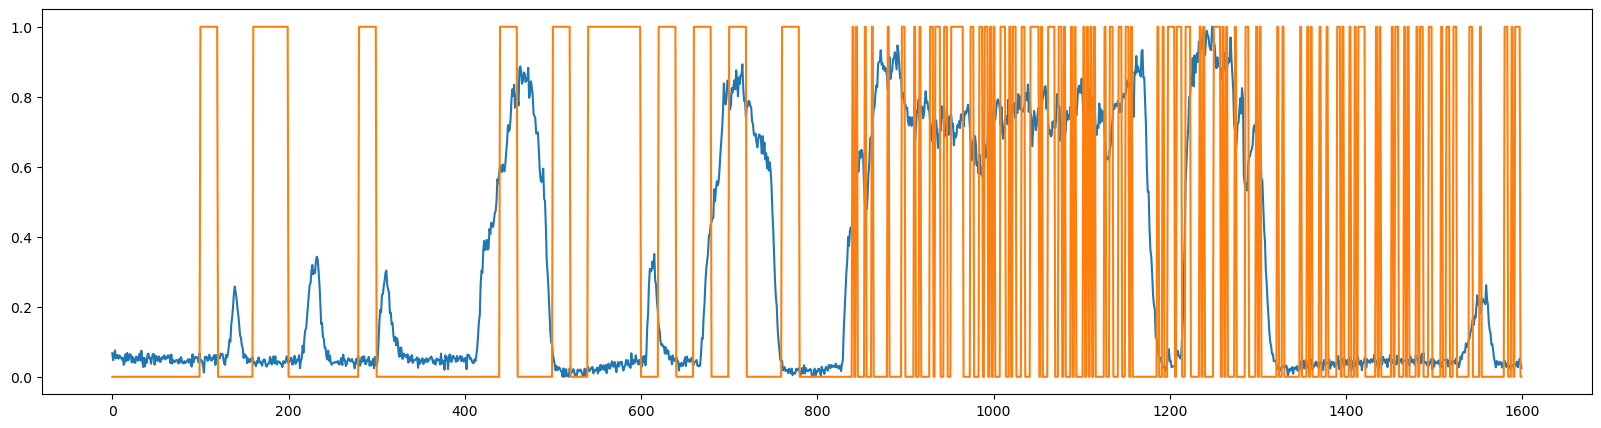

In [130]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(range (1600), response_op['arr_6'][:,9])
ax.plot(range(1600), signal_op['arr_6'])

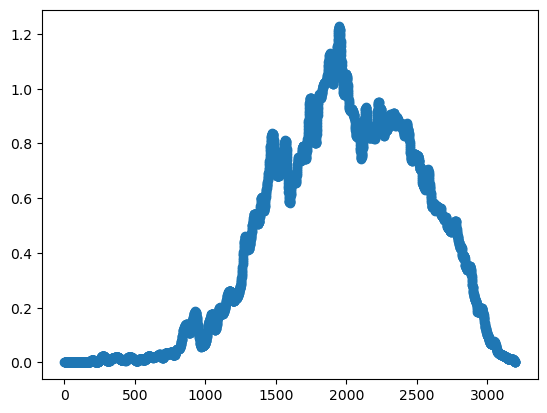

In [116]:
#calc sta
signal_op_6= signal_op['arr_6'][:, 0]
response_op_6 = response_op['arr_6'][:,0]



cross_corr_op = np.correlate(signal_op_6, response_op_6, mode='full')
# number_average = np.append(np.arange(1,101), (np.arange(1,100)[::-1]))
# #normalized by overlap
# cross_corr_normalize = cross_corr/number_average


plt.figure()
plt.scatter(np.arange(cross_corr_op.size), cross_corr_op/100)
plt.show()




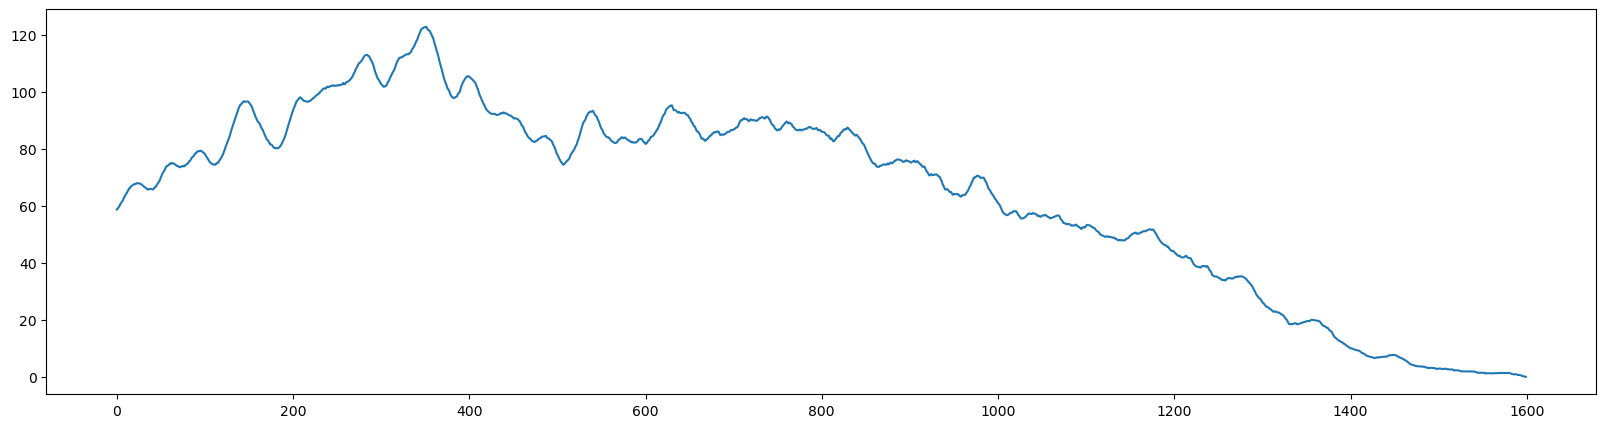

In [122]:
cross_corr_op_cut = cross_corr_op[len(cross_corr_op)//2 :]
cross_corr_op_cut.shape

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(range(1600), cross_corr_op_cut)

In [123]:
cor_cut_final_op= cor_cut[0:600]

In [ ]:
s_of_t = np.zeros((600,response_op[600:].size ))

for stim in range(stim_1798[600:].size):
    #stim_1798[i]= stim_1798[i+600]
    s_of_t[:,stim] = stim_1798[stim:stim+600] 

In [131]:
#new sta
#take signal at a point * by the vector of stimulus time points in the same time and preceding 4 time ( 5 timepoint bin windowsize) 
#take each vector and sum it and take the average (divide by sum of cacium signal)

#calc sta
signal_op_6= signal_op['arr_6'][:, 0]
response_op_6 = response_op['arr_6'][:,0]




In [240]:

def sta( stimulus, response, window_size ):
    sums = np.zeros((window_size))
    for i in range(window_size -1, len(response)): # to add bigger bin size
        start_idx = i - window_size + 1
    
        weighted_response = (response[i]) * (stimulus[start_idx : i + 1] - (np.mean(stimulus[start_idx : i + 1]))) # +1 to include the current time point
        sums += weighted_response
    sta = sums/np.sum(response[window_size -1:], axis = 0)
    return sta



In [243]:
try1 = sta(stimulus = signal_op_6, response = response_op_6, window_size= 50)
try1.shape

(50,)

([<matplotlib.axis.XTick at 0x166ac7ac0>,
 [Text(0.0, 0, '50.0'),
  Text(12.5, 0, '37.5'),
  Text(25.0, 0, '25.0'),
  Text(37.5, 0, '12.5'),
  Text(50.0, 0, '0.0')])

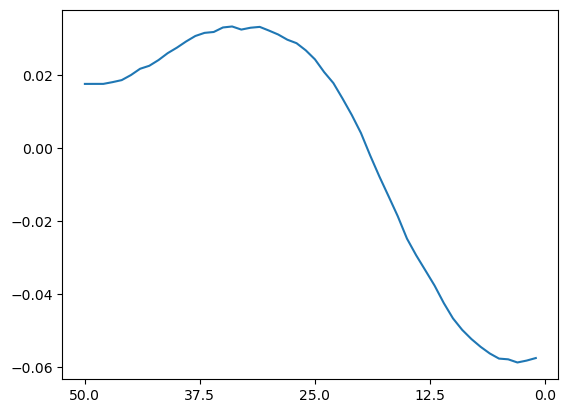

In [242]:
plt.plot(try1)
x_ticks = np.linspace(0, 50, 5)
x_labels = np.linspace(50, 0, 5)
plt.xticks(ticks= x_ticks, labels=x_labels) 

In [192]:
#load data for distance matrix
bacteria = np.load('ProcAiryData/Yfull_op50_SF.npz')

In [195]:
bacteria_arr_0= bacteria['arr_0']

In [197]:
#pearson correlation distance

bacteria_0_df = pd.DataFrame(bacteria_arr_0)

#correlation_matrix = scipy.stats.pearsonr(bacteria_arr_0, bacteria_arr_0)

corr_matrix = bacteria_0_df.corr()

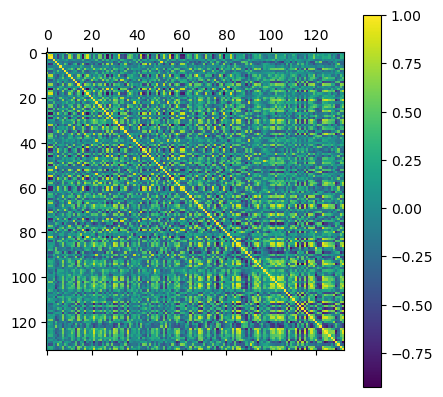

In [208]:
plt.matshow(corr_matrix)
plt.colorbar()

In [203]:
distance_matrix = 1 - corr_matrix

In [218]:
distance_matrix.max()

0      1.151600
1      1.901924
2      1.851226
3      1.288893
4      1.630197
         ...   
128    1.778481
129    1.887165
130    1.480805
131    1.668305
132    1.887165
Length: 133, dtype: float64

/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


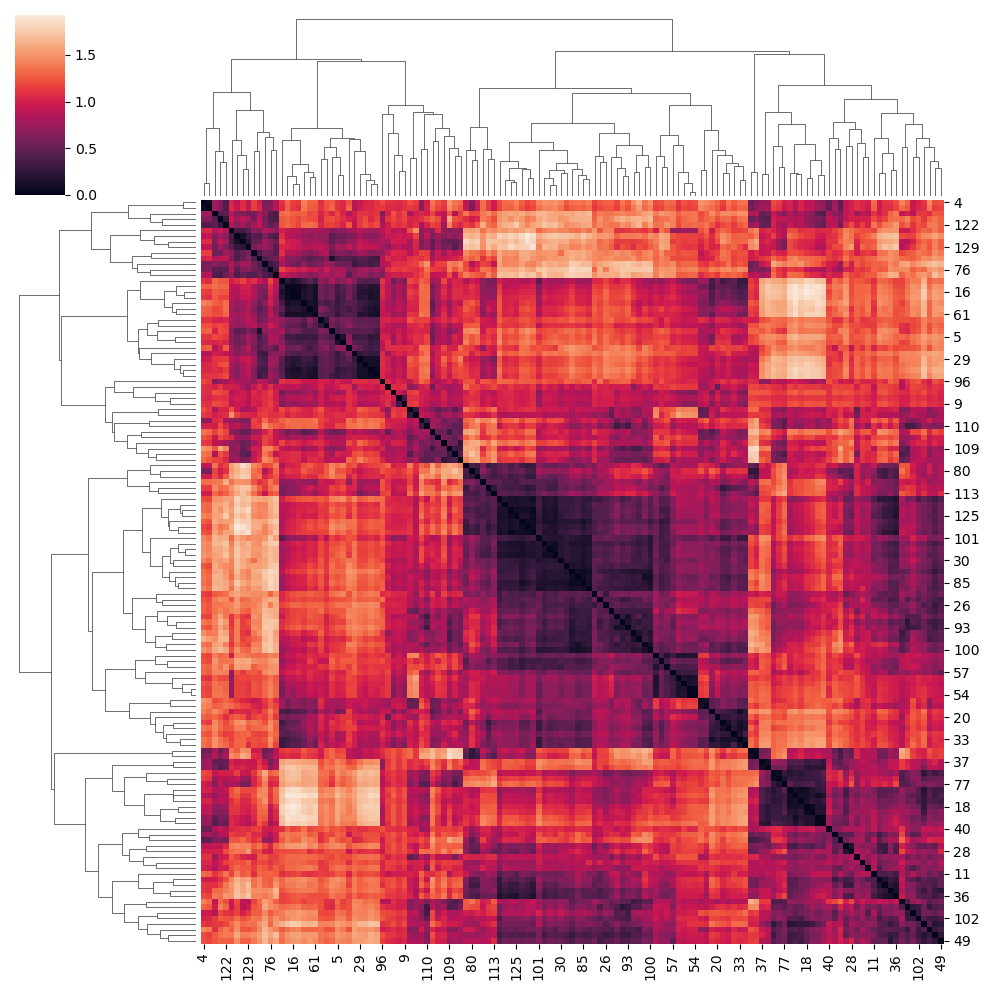

In [215]:
# plt.matshow(distance_matrix)
# plt.colorbar()

sns.clustermap(distance_matrix)


In [204]:
# distance matrix with squared pearson correlation matrix

distance_matrix_squaredp = 1 - corr_matrix**2

/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/iuliarusu/miniconda3/envs/HMDS/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


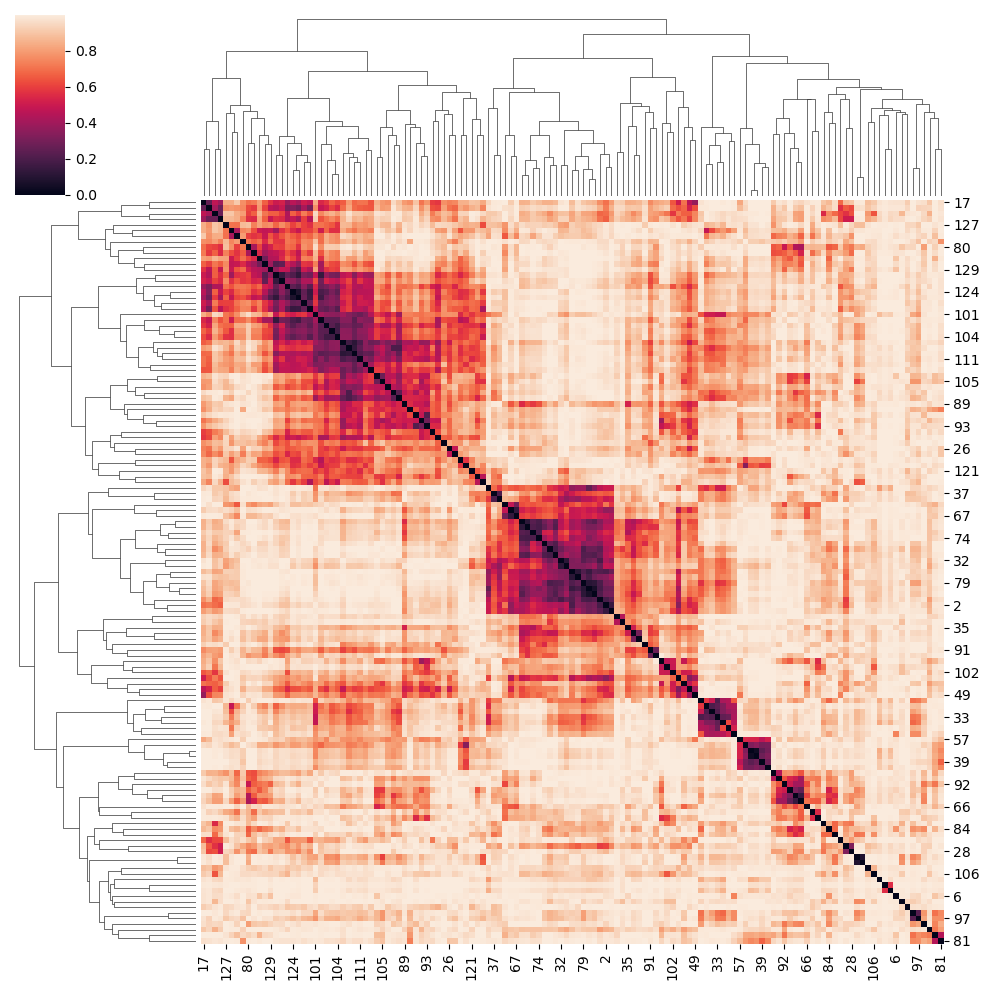

In [216]:
# plt.matshow(distance_matrix_squaredp)
# plt.colorbar()

sns.clustermap(distance_matrix_squaredp)